In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [4]:
confidences_all = load_pickle('../../data/label_studio/all_paddle_confidences.pkl')
offsets = load_pickle('../../data/label_studio/both_offsets.pkl')
labels = load_pickle('../../data/label_studio/both_labels.pkl')
preds = load_pickle('../../data/label_studio/both_paddle_predictions.pkl')

In [5]:
# because i only stored confidences for all orientations, we first need to retrieve the ones corresponding to the correct orientations

In [6]:
confidences = []
for idx, offset in enumerate(offsets):
    confidences += [confidences_all[4*idx + offset]]

Text(0.5, 1.0, 'paddle confidences')

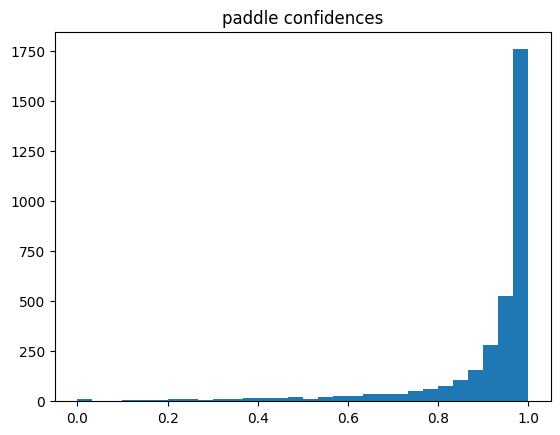

In [7]:
# investigate distribution of confidences

plt.hist(confidences, bins='rice')
plt.title('paddle confidences')

In [38]:
geq_x = np.arange(0.0, 1.0, 0.01)

In [39]:
confidences = np.asarray(confidences)

In [40]:
# compute levenshtein distance 

In [41]:
import sys
sys.path.append('../../')
from ocr_ensemble.evaluation import levenshtein as lev

In [42]:
levs = np.asarray([lev(gt, pred) for gt, pred in zip(labels, preds)])

In [43]:
means = []
stds = []
cnts = []
for x in geq_x:
    means += [np.mean(levs[confidences >= x])]
    stds += [np.std(levs[confidences >= x])]
    cnts += [np.sum(confidences >= x)]

means = np.asarray(means)
stds = np.asarray(stds)
cnts = np.asarray(cnts)

In [54]:
def gaussian_confidence_plot(means, stds, cnts, geq_x):
    upper = means + 1.96*stds/np.sqrt(cnts)
    lower = means - 1.96*stds/np.sqrt(cnts)
    x = np.arange(len(means))
    plt.plot(x, means)
    plt.fill_between(x, lower, upper, color='blue', alpha=0.5)
    plt.plot(x, [1]*len(x), 'k--')
    plt.plot(x, [0.8]*len(x), 'k--')
    plt.plot(x, [0.6]*len(x), 'k--')
    plt.xticks(np.arange(0, len(geq_x), 5),  ['%.0f'%(100*b) for b in geq_x[::5]])
    plt.xlim(0, len(geq_x)-1)
    plt.ylim(0, upper.max())

Text(0.5, 0, 'confidences >= x')

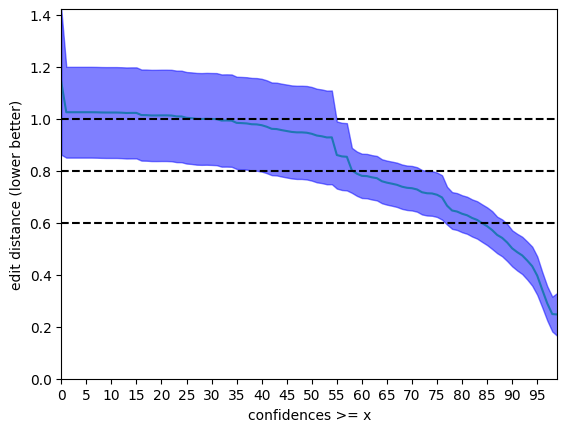

In [55]:
gaussian_confidence_plot(means, stds, cnts, geq_x)
plt.ylabel('edit distance (lower better)')
plt.xlabel('confidences >= x')

In [104]:
(confidences > 0.91).sum() / len(confidences)

0.7401012206013694

In [108]:
preds = np.asarray(preds)
labels = np.asarray(labels)

preds_keep = preds[confidences > 0.91]
labels_keep = labels[confidences > 0.91]

In [113]:
for _ in range(20):
    idx = np.random.randint(len(preds_keep))
    print('%s\n%s'%(labels_keep[idx], preds_keep[idx]))

DANUBE
DANUBE
Ask a question or
Ask a question or
KILLESTER
KILLESTER
TO
TO
B b O o
BbOo
VOTING
VOTING
ACROSS
ACROSS
Huerco S.
Huerco S.
www.mannaplay.com
www.mannaplay.com
NEWS
NEWS
BASS
BASS
9
9
21
21
max
nax
Original Mix
Original Mix
14
14
RATE
RATE
OW!
W!
Analytics
Analytics
6.8 - 8.5
6.8 - 8.5
